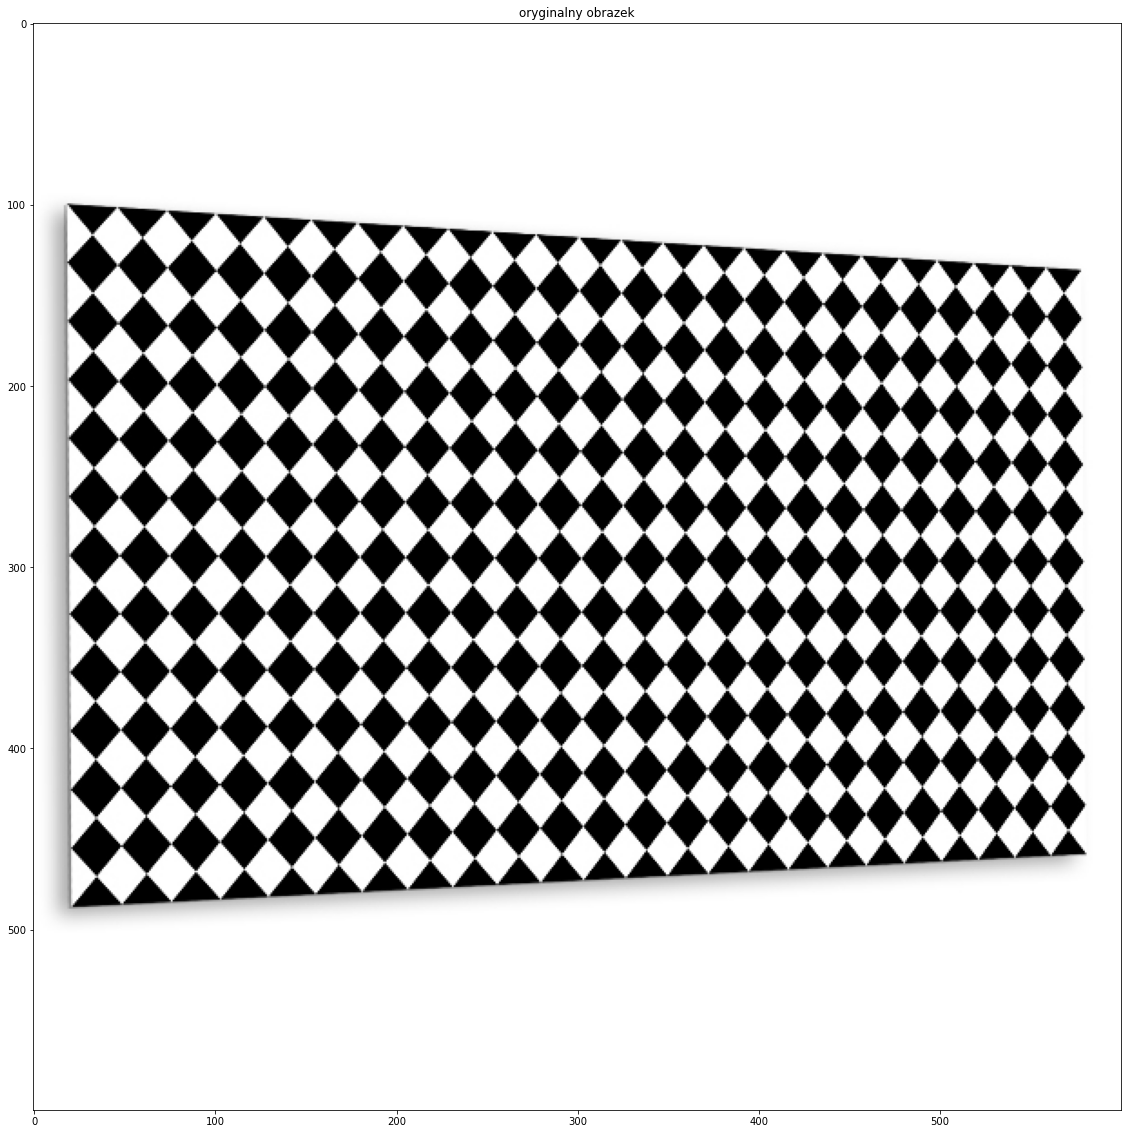

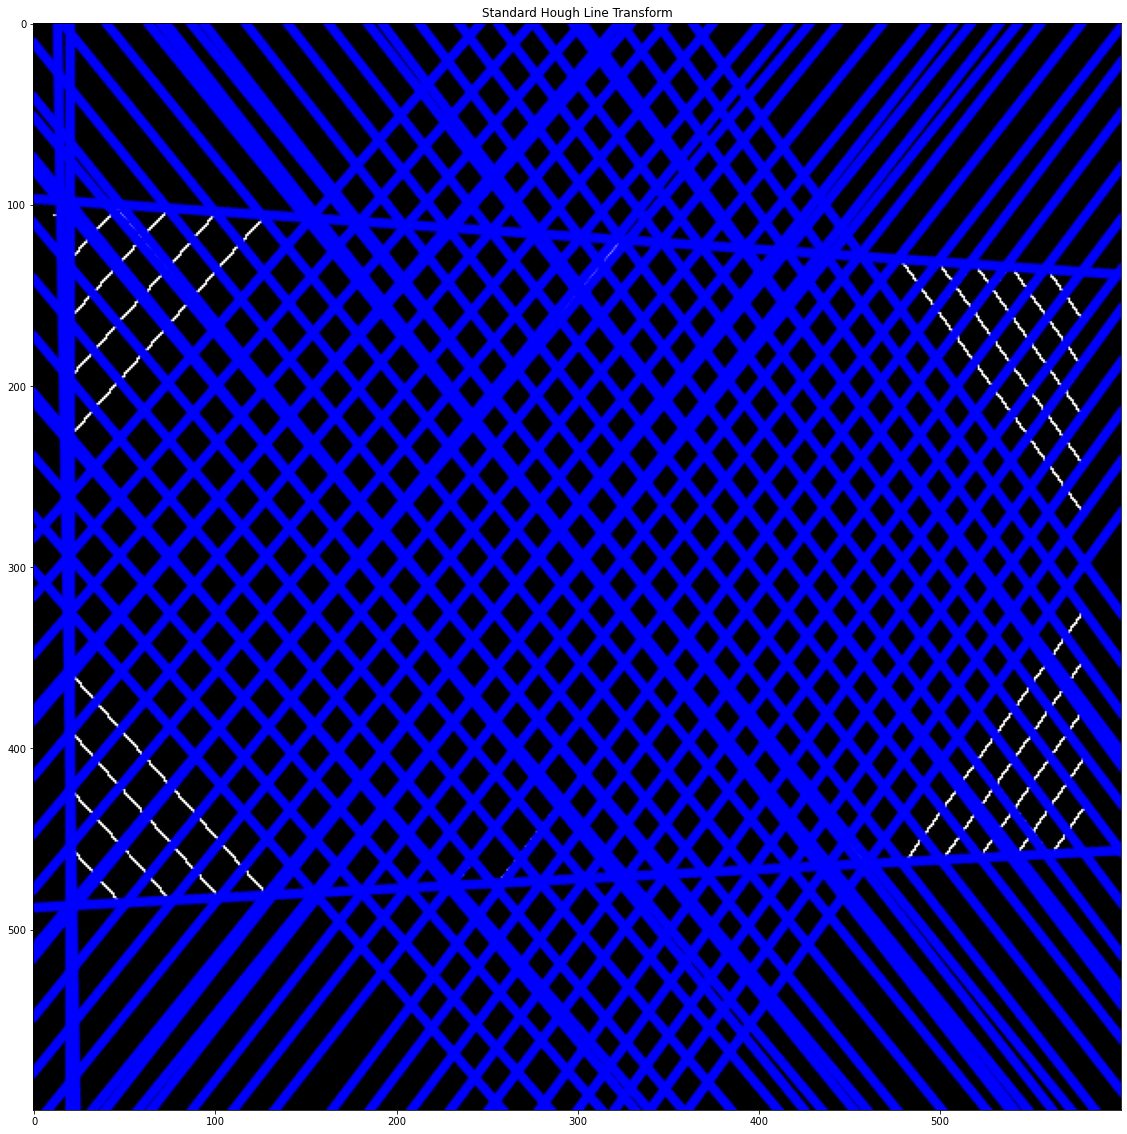

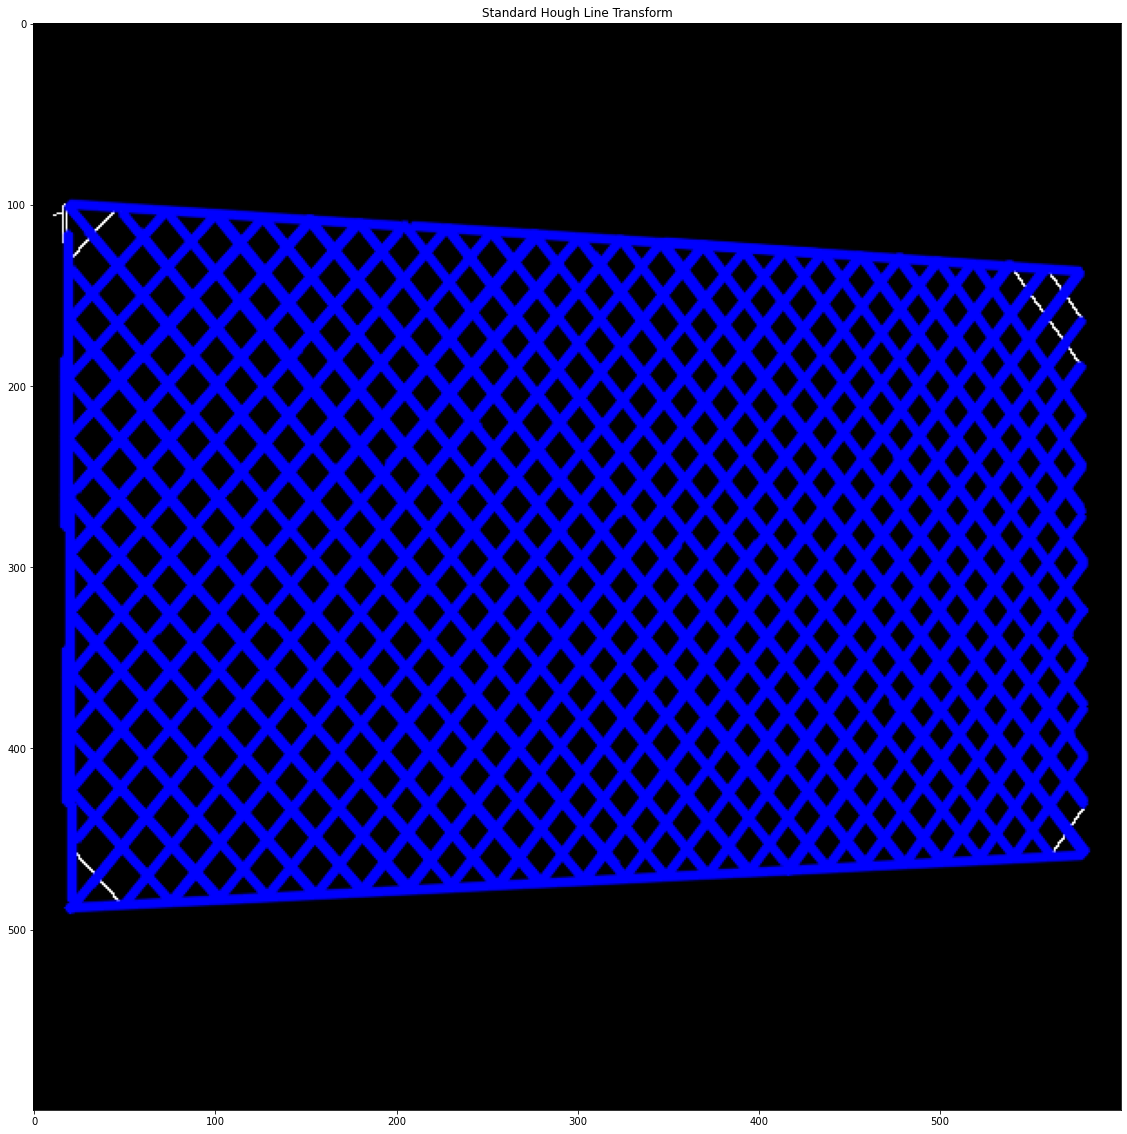

0

In [24]:

# model referncyjny wersja 1

import numpy as np
import matplotlib.pyplot as plt
import cv2
import math


def line_detect(img):
    
    # pobranie obrazka wejściowego
    source_image = cv2.imread(img)
    
    # użycie algoytmu detekcji krawędzi Canny
    distance = cv2.Canny(source_image, 50, 200, None, 3)
    
    
    # kopiowanie krawędzi do obrazka wyświetlającego wynik w formacie BGR
    distance_2 = cv2.cvtColor(distance, cv2.COLOR_GRAY2BGR)
    distance_probabilistic = np.copy(distance_2)
    
    # 
    lines = cv2.HoughLines(distance, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            
            x0 = math.cos(theta) * rho
            y0 = math.sin(theta) * rho
            
            pt1 = (int(x0 + 1000*(-math.sin(theta))), int(y0 + 1000*(math.cos(theta))))
            pt2 = (int(x0 - 1000*(-math.sin(theta))), int(y0 - 1000*(math.cos(theta))))
            
            cv2.line(distance_2, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    # wersja probabilistyczna
    lines_2 = cv2.HoughLinesP(distance, 1, np.pi / 180, 50, None, 50, 10)
    
    if lines_2 is not None:
        for i in range(0, len(lines_2)):
            l = lines_2[i][0]
            cv2.line(distance_probabilistic, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    
    # wyświetlenie obrazka oryginalnego i po dwóch rodzajach transformaty hougha - standardowej i probabilistycznej
    
    plt.figure(figsize = [20, 20])
    plt.imshow(source_image)
    plt.title('oryginalny obrazek')
    plt.show()
    
    plt.figure(figsize = [20, 20])
    plt.imshow(distance_2)
    plt.title('Standard Hough Line Transform')
    plt.show()
    
    plt.figure(figsize = [20, 20])
    plt.imshow(distance_probabilistic)
    plt.title('Standard Hough Line Transform')
    plt.show()
    
    return 0
    
img = 'chessboard_2.png'

line_detect(img)


# Źródła:

# kod na podstawie dokumetacji OpenCV - Hough Transform
# obrazek szachownicy - źródło https://dywanomat.pl/panel-winylowy-na-sciane-skosna-szachownica-24996467

